In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [248]:
iris_df = pd.read_csv('iris.csv')

In [249]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [250]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [251]:
iris_df.shape

(150, 6)

In [252]:
X_variables = iris_df.iloc[:,1:5]
X_variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [253]:
y_variable = iris_df.iloc[:,5]

In [124]:
#iris_df = iris_df.drop(columns=['Species'])

In [254]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [255]:
covariance_matrix = np.cov(transformed_df.T)

In [256]:
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [257]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [258]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [259]:
pca = PCA()

In [260]:
pca = pca.fit(transformed_df)

In [261]:
explained_variance = pca.explained_variance_ratio_

In [262]:
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

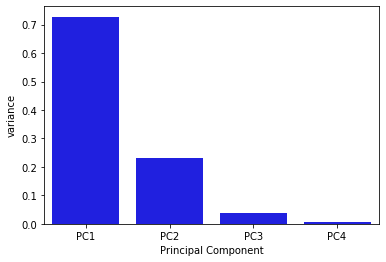

In [263]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

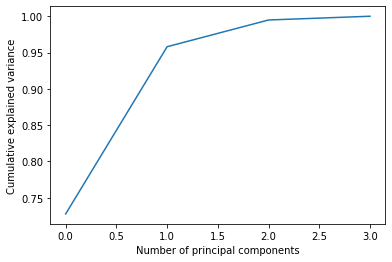

In [264]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [269]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

In [281]:
iris_df['Species'] = iris_df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

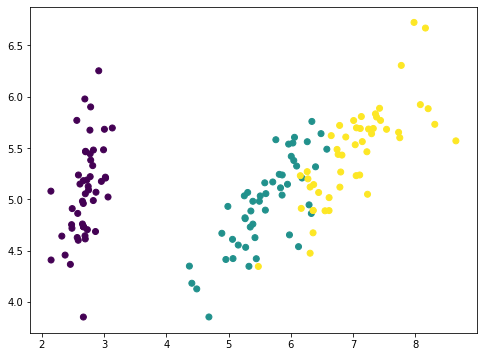

In [285]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=iris_df['Species'])
plt.show()

In [286]:
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)

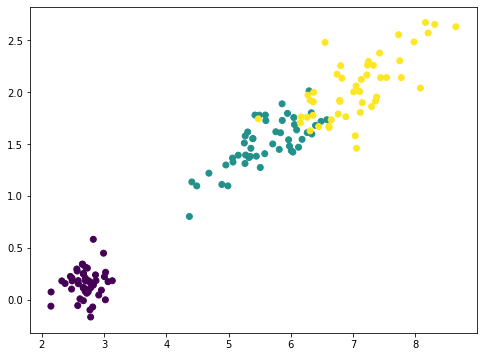

In [288]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=iris_df['Species'])
plt.show()

# Implementation of SVD is done here

In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [316]:
mushrooms_df = pd.read_csv('mushrooms.csv')

In [317]:
mushrooms_df.shape

(8124, 23)

In [318]:
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [319]:
encoder = LabelEncoder()

In [320]:
for col in mushrooms_df.columns:
    mushrooms_df[col] = encoder.fit_transform(mushrooms_df[col])

In [321]:
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [322]:
X_variables = mushrooms_df.iloc[:,1:23]
y_label = mushrooms_df.iloc[:, 0]

In [324]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

In [325]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)


In [326]:
u.shape

(8124, 8124)

In [328]:
s.shape

(22,)

In [329]:
v.shape

(22, 22)

Text(0, 0.5, 'Percent of the variance explained')

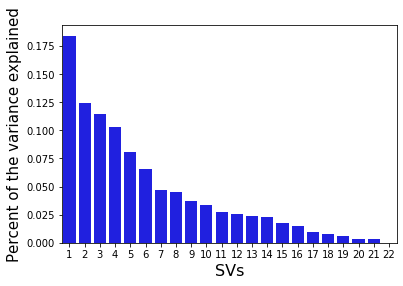

In [335]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=var_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [339]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=mushrooms_df["class"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,1,0.003238,-0.006710
1,0,0.012864,0.001919
2,0,0.010474,-0.001863
3,1,0.004988,-0.005202
4,0,-0.003887,0.008522


In [341]:
svd_df['Class'] = svd_df['Class'].replace({1:'Edible', 0:'Poison'})

Text(0, 0.5, 'SV 2: 12.4%')

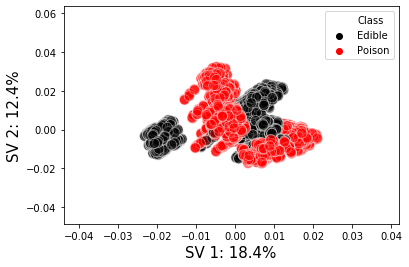

In [345]:
color_dict = dict({'Edible':'Black',
                   'Poison': 'Red'})
# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Class", 
                palette=color_dict, 
                data=svd_df, s=105,
                alpha=0.5)
plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100), fontsize=15)